<a href="https://colab.research.google.com/github/mounirouadi/Deep-learning-for-computer-vision-workshop-V2.0/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels)= keras.datasets.fashion_mnist.load_data()

In [ ]:
print('train images shape :',train_images.shape)
print('train lables shape :',train_labels.shape)
print('test images shape :',test_images.shape)
print('test lables shape :',test_labels.shape)

train images shape : (60000, 28, 28)
train lables shape : (60000,)
test images shape : (10000, 28, 28)
test lables shape : (10000,)


# Label	Description
0    T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

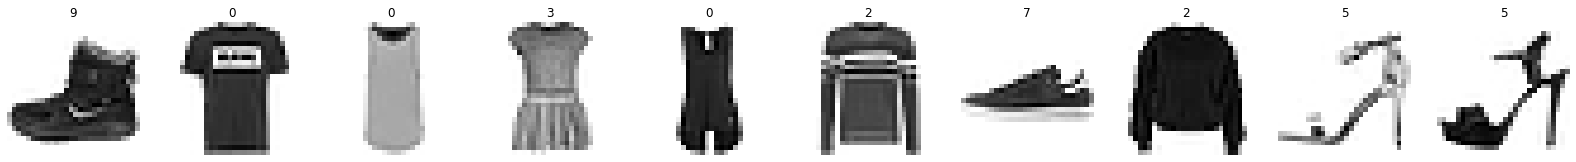

In [ ]:
fig, axes = plt.subplots(1,10,figsize=(28,28))

for i in range(10):
    axes[i].set_axis_off()
    axes[i].imshow(train_images[i], cmap='binary')
    axes[i].set_title(train_labels[i])

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Flatten(input_shape=(28,28)))
network.add(layers.Dense(512, activation='relu', input_shape=(28,28)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='model.h5',verbose=1)
]

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001B9E8C10670>>

In [ ]:
from keras.utils import to_categorical

train_images/255
test_images/255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
history = network.fit(train_images, train_labels,callbacks=my_callbacks, epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3913 - accuracy: 0.8679

Epoch 00001: saving model to model.h5
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3492 - accuracy: 0.8763

Epoch 00002: saving model to model.h5
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3447 - accuracy: 0.8776

Epoch 00003: saving model to model.h5
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3398 - accuracy: 0.8783

Epoch 00004: saving model to model.h5
Epoch 5/10
469/469 [==============================] - 4s 7ms/step - loss: 0.3424 - accuracy: 0.8786

Epoch 00005: saving model to model.h5
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3336 - accuracy: 0.8800

Epoch 00006: saving model to model.h5
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3373 - accuracy: 0.8806

Epoch 00007: saving model to model.h5
Epoch 8/10
469/469 [=======

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5570 - accuracy: 0.8306


Text(0.5, 0, 'epoch')

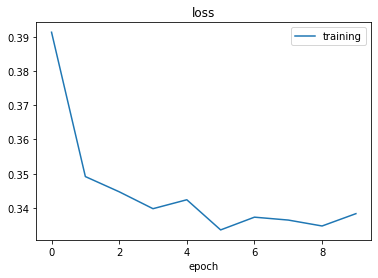

In [ ]:
#plotting the loss graph 
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.legend(['training' , 'validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

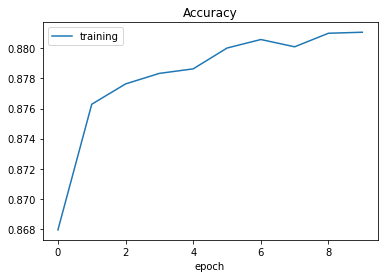

In [ ]:
#plotting the accuracy graph 
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.legend(['training' , 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

# Predictions

the model predicted a 4


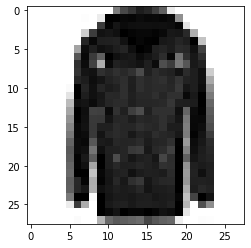

In [ ]:
i= 762
model  = keras.models.load_model('model.h5')
output = model.predict(test_images[i].reshape(1,28,28))

plt.imshow(test_images[i], cmap= 'binary')
print("the model predicted a", np.argmax(output))

# Label	Description
0    T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot